In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\Data-processed\crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
corr  = df.corr(numeric_only = True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

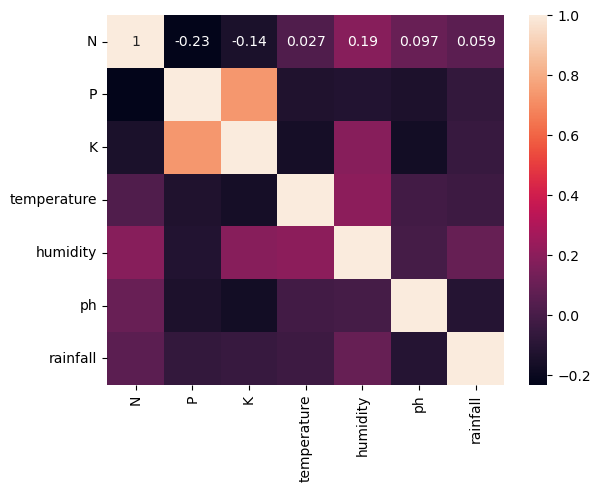

In [12]:
sns.heatmap(corr,annot=True)

# Seperating feature and target label

In [13]:
features =df[['N', 'P', 'K', 'temperature','humidity', 'ph' , 'rainfall']]
target = df['label']
labels = df['label']

In [14]:
acc = []
model=[]


In [15]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size=0.2,random_state = 2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x= metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is:", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is: 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
score = cross_val_score(DecisionTree, features ,target,cv=5)

score

# saving trained Decision Tree model

In [19]:
import pickle
DT_pkl_filename =r'C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename,'wb')
pickle.dump(DecisionTree,DT_Model_pkl)
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x=metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [21]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [22]:
import pickle
NB_pkl_filename = r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\NBClassifier.pkl"
NB_Model_pkl = open(NB_pkl_filename,'wb')
pickle.dump(NaiveBayes,NB_Model_pkl)
NB_Model_pkl.close()

# suport vector machine 

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel ='poly', degree =3 , C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x= metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is : ", x)
print(classification_report(Ytest,predicted_values))

SVM's Accuracy is :  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.

In [24]:
#saving trained SVM model

In [25]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\SVMClassifier.pkl"
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [27]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\LogisticRegression.pkl"
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [30]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

# saving trained Random model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename =  r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\RandomForest.pkl"
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [32]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# # Xtrain = le.fit_transform(Xtrain)
# Ytrain = le.fit_transform(Ytrain)
# YTest = le.fit_transform(Ytest)

In [33]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [36]:

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)
pd.to_numeric

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [35]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

# saving trained XGboost model

In [37]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = r"C:\Users\Shivam Sharma\OneDrive\Desktop\crop\models\XGBoost.pkl"
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy comparision

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

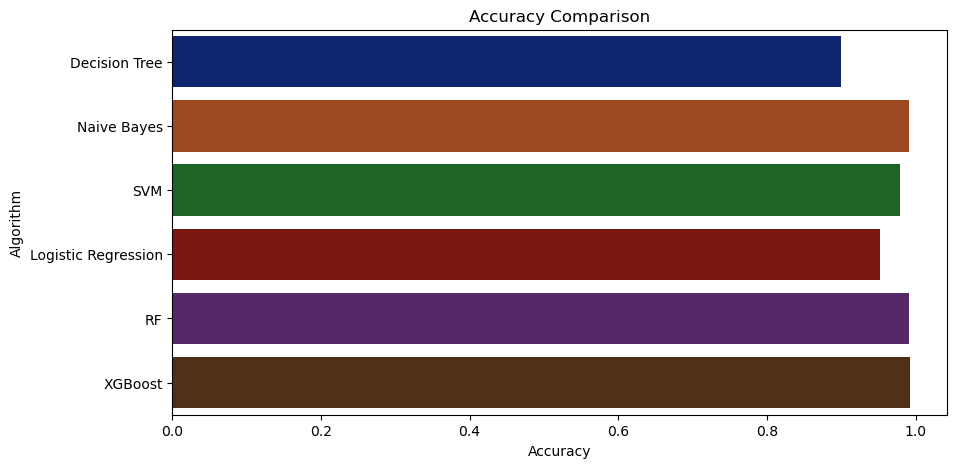

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [39]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


# Making a prediction

In [40]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [41]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
